<a href="https://colab.research.google.com/github/Sriram-Sudharsan/Smart-Self-Checkout-using-CV/blob/main/TCS_IC_Retail_(1).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Image classification - TCS Internship

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import os
import PIL
import tensorflow as tf

from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')



Mounted at /content/gdrive


In [ ]:
import pathlib
data = pathlib.Path('/content/gdrive/MyDrive/Dataset/TCS_Data_Augmented')
#Identifying number of images belonging to the three formats 
count = len(list(data.glob('*/*.png')))
count1 = len(list(data.glob('*/*.jpg')))
count2 = len(list(data.glob('*/*.jpeg')))
#Note currently searched only .png format images


count+count1+count2

288

In [ ]:
#Creating a list and adding the images of Item Name: Glucon_D,Atta,Maaza,Maggi and Oreo
import PIL 

Glucon = list(data.glob('Glucon_D/*'))
Atta = list(data.glob('Atta/*'))
Hide_Seek = list(data.glob('Hide_Seek/*'))
Maaza = list(data.glob('Maaza/*'))
Maggi = list(data.glob('Maggi/*'))
Oreo = list(data.glob('Oreo/*'))
print("Oreo")
print(len(Oreo))
print("Maaza")
print(len(Maaza))
print("Hide&Seek")
print(len(Hide_Seek))
print("Glucon_D")
print(len(Glucon))
print("Atta")
print(len(Atta))


Oreo
48
Maaza
48
Hide&Seek
48
Glucon_D
48
Atta
49


In [ ]:
 batch_size = 10
img_height = 530
img_width = 530

In [ ]:
train_ds = tf.keras.preprocessing.image_dataset_from_directory(
  data,
  validation_split=0.1, #Doing 90-10 train-valid split as suggested
  subset="training",
  seed=123,
  image_size=(img_height, img_width),
  batch_size=batch_size)

Found 288 files belonging to 6 classes.
Using 260 files for training.


In [ ]:
val_ds = tf.keras.preprocessing.image_dataset_from_directory(
  data,
  validation_split=0.1, #Doing 90-10 train-valid split as suggested
  subset="validation",
  seed=123,
  image_size=(img_height, img_width),
  batch_size=batch_size)

Found 288 files belonging to 6 classes.
Using 28 files for validation.


In [ ]:
#Identifying types of classes
class_names = train_ds.class_names
print(class_names)

['Atta', 'Glucon_D', 'Hide_Seek', 'Maaza', 'Maggi', 'Oreo']


In [ ]:
for image_batch, labels_batch in train_ds:
  print(image_batch.shape)
  print(labels_batch.shape)
  break

(10, 530, 530, 3)
(10,)


In [ ]:
#Note-self: AUTOTUNE tunes value dynamically
AUTOTUNE = tf.data.AUTOTUNE

train_ds = train_ds.cache().shuffle(1000).prefetch(buffer_size=AUTOTUNE)
val_ds = val_ds.cache().prefetch(buffer_size=AUTOTUNE)
normalization_layer = layers.experimental.preprocessing.Rescaling(1./255)


In [ ]:
#Noteself: Normalizing values between 0 and 1
normalized_ds = train_ds.map(lambda x, y: (normalization_layer(x), y))
image_batch, labels_batch = next(iter(normalized_ds))
first_image = image_batch[0]

print(np.min(first_image), np.max(first_image))

0.0 1.0


In [ ]:
num_classes = 6
#'Atta', 'Glucon_D', 'Hide_Seek', 'Maaza', 'Maggi', 'Oreo'


model = Sequential([
  layers.experimental.preprocessing.Rescaling(1./255, input_shape=(img_height, img_width, 3)),
  layers.Conv2D(16, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(32, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(64, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Flatten(),
  layers.Dense(128, activation='relu'),
  layers.Dense(num_classes)
])

model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [ ]:
model.summary()


Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
rescaling_1 (Rescaling)      (None, 530, 530, 3)       0         
_________________________________________________________________
conv2d (Conv2D)              (None, 530, 530, 16)      448       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 265, 265, 16)      0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 265, 265, 32)      4640      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 132, 132, 32)      0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 132, 132, 64)      18496     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 66, 66, 64)        0

In [ ]:
epochs=10
history = model.fit(
  train_ds,
  validation_data=val_ds,
  epochs=epochs
)

Epoch 1/10
26/26 [==============================] - 41s 457ms/step - loss: 3.5367 - accuracy: 0.3923 - val_loss: 0.5413 - val_accuracy: 0.8571
Epoch 2/10
26/26 [==============================] - 3s 113ms/step - loss: 0.3379 - accuracy: 0.8923 - val_loss: 0.1075 - val_accuracy: 1.0000
Epoch 3/10
26/26 [==============================] - 3s 112ms/step - loss: 0.1541 - accuracy: 0.9500 - val_loss: 0.0411 - val_accuracy: 0.9643
Epoch 4/10
26/26 [==============================] - 3s 113ms/step - loss: 0.0058 - accuracy: 1.0000 - val_loss: 0.0024 - val_accuracy: 1.0000
Epoch 5/10
26/26 [==============================] - 3s 112ms/step - loss: 4.5835e-04 - accuracy: 1.0000 - val_loss: 4.1117e-04 - val_accuracy: 1.0000
Epoch 6/10
26/26 [==============================] - 3s 112ms/step - loss: 2.2309e-04 - accuracy: 1.0000 - val_loss: 2.3977e-04 - val_accuracy: 1.0000
Epoch 7/10
26/26 [==============================] - 3s 113ms/step - loss: 1.3743e-04 - accuracy: 1.0000 - val_loss: 1.9036e-04 - va

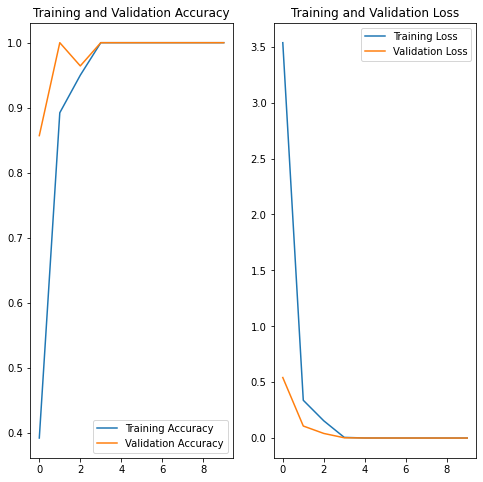

In [ ]:
  acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

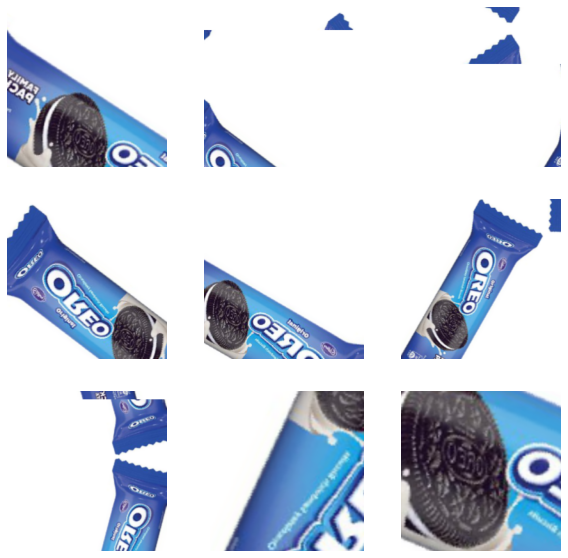

In [ ]:
data_augmentation = keras.Sequential(
  [
    layers.experimental.preprocessing.RandomFlip("horizontal_and_vertical", 
                                                 input_shape=(img_height, 
                                                              img_width,
                                                              3)),
    layers.experimental.preprocessing.RandomRotation(0.6), #Note to Self: changed parameters
    layers.experimental.preprocessing.RandomZoom(0.6),
    layers.experimental.preprocessing.RandomTranslation(height_factor=0.2, width_factor=0.2, fill_mode="wrap"),
    #layers.experimental.preprocessing.RandomContrast(0.1)
    layers.experimental.preprocessing.RandomCrop(250,250)


    #Note to Self: Changed Parameters
  ]
)


plt.figure(figsize=(10, 10))
for images, _ in train_ds.take(1):
  for i in range(9):
    augmented_images = data_augmentation(images)
    ax = plt.subplot(3, 3, i + 1)
    plt.imshow(augmented_images[0].numpy().astype("uint8"))
    plt.axis("off")

In [ ]:
model = Sequential([
  data_augmentation,
  layers.experimental.preprocessing.Rescaling(1./255),
  layers.Conv2D(16, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(32, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),

  layers.Dropout(0.2),
  layers.Flatten(),
  layers.Dense(32, activation='relu'),
  layers.Dense(num_classes,activation='softmax')
])
# Note to self: relu: Rectified Linear Unit-Activation Fn#
# Note to self: Dropout takes a fractional number as its input value, in the form such as 0.1, 0.2, 0.4, etc. 
#This means dropping out 10%, 20% or 40% of the output units randomly from the applied layer.


In [ ]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

model.summary()
#Note to self: Optimizers are algorithms or methods used to change 
#the attributes of the neural network such as weights and learning rate to reduce the losses.

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
sequential_1 (Sequential)    (None, 250, 250, 3)       0         
_________________________________________________________________
rescaling_2 (Rescaling)      (None, 250, 250, 3)       0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 250, 250, 16)      448       
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 125, 125, 16)      0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 125, 125, 32)      4640      
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 62, 62, 32)        0         
_________________________________________________________________
dropout (Dropout)            (None, 62, 62, 32)       

In [ ]:
epochs = 60
history = model.fit(
  train_ds,
  validation_data=val_ds,
  epochs=epochs
)

Epoch 1/60


/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/backend.py:4930: UserWarning: "`sparse_categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a sigmoid or softmax activation and thus does not represent logits. Was this intended?"
  '"`sparse_categorical_crossentropy` received `from_logits=True`, but '


26/26 [==============================] - 3s 58ms/step - loss: 2.8091 - accuracy: 0.3115 - val_loss: 1.4225 - val_accuracy: 0.3571
Epoch 2/60
26/26 [==============================] - 1s 47ms/step - loss: 1.1761 - accuracy: 0.5346 - val_loss: 0.9390 - val_accuracy: 0.5714
Epoch 3/60
26/26 [==============================] - 1s 48ms/step - loss: 0.8452 - accuracy: 0.6538 - val_loss: 0.6345 - val_accuracy: 0.8929
Epoch 4/60
26/26 [==============================] - 1s 46ms/step - loss: 0.5740 - accuracy: 0.8038 - val_loss: 0.4040 - val_accuracy: 0.8929
Epoch 5/60
26/26 [==============================] - 1s 52ms/step - loss: 0.4986 - accuracy: 0.8000 - val_loss: 0.2154 - val_accuracy: 1.0000
Epoch 6/60
26/26 [==============================] - 1s 47ms/step - loss: 0.3543 - accuracy: 0.9000 - val_loss: 0.4318 - val_accuracy: 0.7857
Epoch 7/60
26/26 [==============================] - 1s 47ms/step - loss: 0.2806 - accuracy: 0.9000 - val_loss: 0.1766 - val_accuracy: 0.9643
Epoch 8/60
26/26 [======

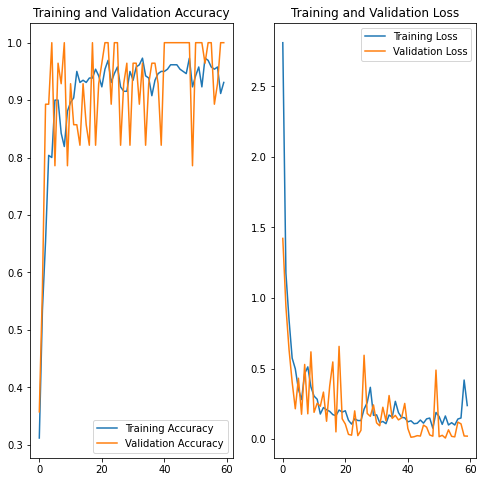

In [ ]:
  acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()



In [ ]:
!pip install pyyaml h5py

In [ ]:
tf.keras.models.save_model(model,'my_model2.hdf5')


In [ ]:

import pickle
from sklearn.externals import joblib
file_dir = 'Mymodelnew1.h5'
model.save(file_dir)


/usr/local/lib/python3.7/dist-packages/sklearn/externals/joblib/__init__.py:15: FutureWarning: sklearn.externals.joblib is deprecated in 0.21 and will be removed in 0.23. Please import this functionality directly from joblib, which can be installed with: pip install joblib. If this warning is raised when loading pickled models, you may need to re-serialize those models with scikit-learn 0.21+.
  warnings.warn(msg, category=FutureWarning)


In [ ]:
import pathlib
data1 = pathlib.Path('/content/gdrive/MyDrive/Dataset/Test') 
#check whether the image count is correct- Have 3 images in test folder. 2 Oreo and 1 Glucon D
count2 = len(list(data1.glob('*.jpeg')))


count2

4

In [ ]:
from tensorflow.keras.models import load_model
img = keras.preprocessing.image.load_img('/content/gdrive/MyDrive/Dataset/Test/1.jpg', target_size=(img_height, img_width)
)
img_array = keras.preprocessing.image.img_to_array(img)
img_array = tf.expand_dims(img_array, 0) # Create a batch
modelsaved = "Mymodelnew1.h5"
model1 = load_model(modelsaved)

predictions = model1.predict(img_array)
score = tf.nn.softmax(predictions[0])

print(
    "This image is {} "
    .format(class_names[np.argmax(score)])
)
#Note the above image have not been seen by the model. The image has a picture of a Oreo packet randomly downloaded from the web for the testing purpose

This image is Maggi 


In [ ]:
img = keras.preprocessing.image.load_img('/content/gdrive/MyDrive/Dataset/Test/oreo-biscuit-packet-hand-98504457.jpg', target_size=(img_height, img_width)
)
img_array = keras.preprocessing.image.img_to_array(img)
img_array = tf.expand_dims(img_array, 0) # Create a batch

predictions = model.predict(img_array)
score = tf.nn.softmax(predictions[0])

print(
    "This image is {} "
    .format(class_names[np.argmax(score)])
)
#Note the above image have not been seen by the model. The image has a picture of a gluconD packet(Orange)

This image is Oreo 


In [ ]:
# serialize model to JSON
model_json = model.to_json()
with open("model1.json", "w") as json_file:
    json_file.write(model_json)
# serialize weights to HDF5
model.save_weights("model1.h5")
print("Saved model to disk")

Saved model to disk


In [ ]:
from keras.models import model_from_json
# load json and create model
json_file = open('model1.json', 'r')
loaded_model_json = json_file.read()
json_file.close()
loaded_model = model_from_json(loaded_model_json)
# load weights into new model
loaded_model.load_weights("model1.h5")
print("Loaded model from disk")

Loaded model from disk


In [ ]:
img = keras.preprocessing.image.load_img('/content/gdrive/MyDrive/Dataset/Test/1.jpg', target_size=(img_height, img_width)
)
img_array = keras.preprocessing.image.img_to_array(img)
img_array = tf.expand_dims(img_array, 0) # Create a batch

predictions = loaded_model.predict(img_array)
score = tf.nn.softmax(predictions[0])

print(
    "This image is {} "
    .format(class_names[np.argmax(score)])
)
#Note the above image have not been seen by the model. The image has a picture of a gluconD packet(Orange)

This image is Maggi 
